In [3]:
"""
Here we visulize filters and feature maps
"""

import tensorflow as tf
import numpy as np
from PIL import Image

from tensorflow import keras

from utils.dataset_loader import load_cifar10
from backbone.cnn import CNN_3L, Sequential_CNN_3L


In [4]:
# 1&2 dataset and dataloader
# dataloader,(x_train, y_train), (x_test, y_test)  =  load_cifar10(BATCH_SIZE = 64, buffer_size=1024)

# 3 model 
model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
# model.load_weight(xxx) # load pretrain, so no need for # 4&5 set optimizer and train
model.summary()
print(model.layers)
print(len(model.layers))
# [<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x2b8adb5ae588>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8a9da00e80>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8adb5a8ef0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x2b8ae489c668>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae489ce48>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae48d49b0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x2b8ae48d47b8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae48df908>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae48e9780>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae48e97f0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x2b8ae48ef780>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae48effd0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae48f6dd8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae4901160>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x2b8ae4901ac8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae490a5f8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae4914470>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x2b8ae4914898>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x2b8ae491a470>, <tensorflow.python.keras.layers.core.Flatten object at 0x2b8ae491acf8>, <tensorflow.python.keras.layers.core.Dense object at 0x2b8ae49257b8>, <tensorflow.python.keras.layers.core.Dense object at 0x2b8ae4925a90>, <tensorflow.python.keras.layers.core.Dense object at 0x2b8ae4925fd0>]
# len = 23

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## plot activation/feature maps
 - visualize model.layer.output with specific images
   - layer_outputs --> activation_model --> activation_model.predict()

first_layer_activation size : (1, 14, 14, 512)
Img 0 : mean energy value in layer 4: (49.725147, 466.10052, 0.0, 2509.7964)
sumed first_layer_activation size : (1, 14, 14)
mean/max: (0.31288138, 49.725136, 158.92648)


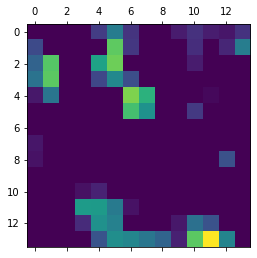

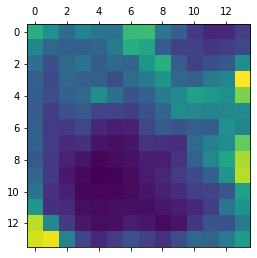

In [58]:
# instantiating a model from a input tensor and all imtermidate out put tensor 
layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

img_tensor = np.random.rand(224,224,3) * 255 # tf.tensor(np.random((224,224,3)))
from PIL import Image
img_tensor = Image.open("/home/hpczeji1/hpc-work/Codebase/Datasets/healthy_aging/marleen_dataset/faces/17.jpg")
img_tensor = img_tensor.resize((224,224))
# from PIL import Image
# img_tensor = Image.fromarray(img_tensor.astype('uint8')).convert('RGBA')
batch_size = 1
imgs_batch_tensor = np.empty((batch_size,224,224,3))
imgs_batch_tensor[0,:,:,:] = img_tensor 

activations = activation_model.predict(imgs_batch_tensor)
first_layer_activation = activations[14] # 第四个 print(first_layer_activation.shape) 第三个是-13
import matplotlib.pyplot as plt
print(f"first_layer_activation size : {first_layer_activation.shape}") # batch_num, w,h,c
#! why activation value is so huge than 256
print(f"Img 0 : mean energy value in layer 4: {np.mean(first_layer_activation[0, :, :, :]), np.max(first_layer_activation[0, :, :, 1]),np.min(first_layer_activation[0, :, :, :]),np.max(first_layer_activation[0, :, :, :])}")
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis') # channel 4

# first_layer_activation = tf.reduce_max(first_layer_activation,axis=3)
# print(f"sumed first_layer_activation size : {first_layer_activation.shape}") 
# plt.matshow(first_layer_activation[0, :, :], cmap='viridis')
# energy_map = first_layer_activation[0, :, :]
# print(f"mean/max: {np.mean(energy_map)/np.max(energy_map), np.mean(energy_map),np.max(energy_map)}")

# energy map
first_layer_activation = np.mean(first_layer_activation,axis=3)  # np.max
print(f"sumed first_layer_activation size : {first_layer_activation.shape}") 
plt.matshow(first_layer_activation[0, :, :], cmap='viridis')
energy_map = first_layer_activation[0, :, :]
print(f"mean/max: {np.mean(energy_map)/np.max(energy_map), np.mean(energy_map),np.max(energy_map)}")

plt.savefig("results/sumed_first_layer_activation.jpg")

#! 1 above plot activations, and 2 follow later link can plot filters(weight units) 
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

## plot filters/weights
 - filters,biases = model.layer.get_weights(),then visualize the filters

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


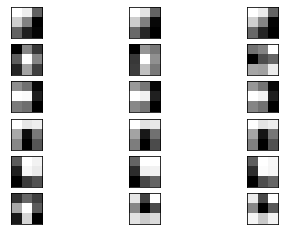

In [8]:
import matplotlib.pyplot as plt
"""Visualize layer weights, refer to  https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
"""
# see how many onv layer we have
for layer in model.layers:
    if "conv" not in layer.name:
        continue
    # get filter
    filters, biases = layer.get_weights()
    print(layer.name,filters.shape)

filters,biases = model.layers[1].get_weights()
f_min,f_max = filters.min(),filters.max()
filters = (filters-f_min)/f_max-f_min
# plot some filters in layer 0,which only has 3 channels

n_filters,ix=6,1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = plt.subplot(n_filters,3,ix)
        ax.set_xticks([])
        ax.set_yticks([])
		# plot filter channel in grayscale
        plt.imshow(f[:, :, j]) # , cmap='gray'
        ix += 1

plt.show()
        


##  calculate complexity in dir

In [ ]:
# instantiating a model from a input tensor and all imtermidate out put tensor 
layer_outputs = [layer.output for layer in model.layers[:]]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

# img_tensor = np.random.rand(224,224,3) * 255 # tf.tensor(np.random((224,224,3)))
# from PIL import Image
# img_tensor = Image.open("/home/hpczeji1/hpc-work/Codebase/Datasets/healthy_aging/marleen_dataset/faces/17.jpg")
# img_tensor = img_tensor.resize((224,224))
# from PIL import Image
# img_tensor = Image.fromarray(img_tensor.astype('uint8')).convert('RGBA')
cat_dict = {"faces":1000,"animals":2000,"places":3000,"objects":4000}
complexity_list = []
for cat_name in cat_dict.keys():
    print(f"Caculating {cat_name} ...")
    source_dir = f"/home/hpczeji1/hpc-work/Codebase/Datasets/healthy_aging/marleen_dataset/{cat_name}/"
    batch_size = 1000
    imgs_batch_tensor = np.empty((batch_size,224,224,3))    
    for i in range(batch_size):
        img_tensor = Image.open(source_dir+f"{i+cat_dict[cat_name]-1000}.jpg")
        img_tensor = img_tensor.convert('RGB')
        # img_tensor = img_tensor.resize((224,224))
        # print(f"shape:{img_tensor.size}")
        try:
            imgs_batch_tensor[i,:,:,:] = img_tensor 
        except:
            print(f"img_tensor.size:{img_tensor.size}")
            raise NotImplementedError

    activations = activation_model.predict(imgs_batch_tensor)
    forth_layer_activation = activations[14] # 第四个 print(first_layer_activation.shape) 第三个是-13
    complexity_list += [np.mean(forth_layer_activation[i, :, :, :]) for i in range(1000)] 

# write to csv
with open("/home/hpczeji1/hpc-work/Codebase/Datasets/healthy_aging/marleen_plot/Id_Complexity.csv", "w") as f:
    f.write("{Id},{Complexity}\n")
    for i in range(4000):
        f.write("{},{}\n".format(i, round(complexity_list[i]),0))

# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [ ]:
# plot hist
import matplotlib.pyplot as plt

cat_dict = {"faces":1000,"animals":2000,"places":3000,"objects":4000}
cat_name = "faces"
for cat_name in cat_dict.keys():
    n, bins, patches = plt.hist(x = complexity_list[cat_dict[cat_name]-1000:cat_dict[cat_name]], bins =list(range(1,101,3)),color='#0504aa',alpha=0.5, rwidth=0.85)  # bins = [round(0.001*i,2) for i in list(range(901,1021,10))]

    # print([0.01*i for i in list(range(0,100,2))])
    plt.ylim(0,150)
    plt.xlim(0,100)

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{cat_name.capitalize()} Complexity Distribution')

    save_dir = "/home/hpczeji1/hpc-work/Codebase/Datasets/healthy_aging/marleen_plot/categories/"
    plt.savefig(save_dir + f'{cat_name.capitalize()}_Complexity_Distribution.jpg', bbox_inches = 'tight')
    plt.show()
    plt.close()

7.1745567
